# Esta cosa es para analizar una base de datos de Airbnb

Primero descargamos las librerias o activamos el .venv

~ #pip install []

~ #source .venv/bin/activate

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_csv('/Users/wil/Documents/TEC/AdvancedAI4DataScience/Airbnb/listings.csv')
columns = data.columns.size
rows = len(data)

print(columns, rows)

79 26067


In [4]:
data.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,35797,https://www.airbnb.com/rooms/35797,20250319150644,2025-03-21,city scrape,Villa Dante,"Dentro de Villa un estudio de arte con futon, ...","Santa Fe Shopping Mall, Interlomas Park and th...",https://a0.muscache.com/pictures/f395ab78-1185...,153786,...,NaN,NaN,NaN,NaN,f,1,1,0,0,NaN
1,44616,https://www.airbnb.com/rooms/44616,20250319150644,2025-03-20,previous scrape,Condesa Haus,A new concept of hosting in mexico through a b...,NaN,https://a0.muscache.com/pictures/251410/ec75fe...,196253,...,4.78,4.98,4.47,NaN,f,9,4,2,0,0.40
2,56074,https://www.airbnb.com/rooms/56074,20250319150644,2025-03-20,city scrape,Great space in historical San Rafael,This great apartment is located in one of the ...,Very traditional neighborhood with all service...,https://a0.muscache.com/pictures/3005118/60dac...,265650,...,4.94,4.76,4.79,NaN,f,1,1,0,0,0.49
3,67703,https://www.airbnb.com/rooms/67703,20250319150644,2025-03-20,previous scrape,"2 bedroom apt. deco bldg, Condesa","Comfortably furnished, sunny, 2 bedroom apt., ...",NaN,https://a0.muscache.com/pictures/3281720/6f078...,334451,...,4.92,4.98,4.92,NaN,f,2,2,0,0,0.31
4,70644,https://www.airbnb.com/rooms/70644,20250319150644,2025-03-22,city scrape,Beautiful light Studio Coyoacan- full equipped !,COYOACAN designer studio quiet & safe! well eq...,Coyoacan is a beautiful neighborhood famous fo...,https://a0.muscache.com/pictures/f397d2da-d045...,212109,...,4.98,4.96,4.92,NaN,f,3,2,1,0,0.83


In [ ]:
print(data.columns.values)

Index(['id', 'scrape_id', 'host_id', 'host_listings_count',
       'host_total_listings_count', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'calendar_updated', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'availability_eoy', 'number_of_reviews_ly', 'estimated_occupancy_l365d',
       'estimated_revenue_l365d', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value', 'license',
       'calculated_host_listings_count',
       '

# Actividad

Obtener:

* mean price
* room_type más común
* 10 alcaldias con más alojamiento
* Las 10 personas con más alojamientos (host_name)

## Precio promedio

In [6]:
data['price']

0        $3,982.00
1              NaN
2          $585.00
3              NaN
4        $1,015.00
           ...    
26062      $529.00
26063      $472.00
26064      $399.00
26065    $1,494.00
26066    $1,722.00
Name: price, Length: 26067, dtype: object

In [7]:
#Eliminar valores nulos
data = data.dropna(subset=['price'])

data['price']

0        $3,982.00
2          $585.00
4        $1,015.00
6        $3,982.00
7          $327.00
           ...    
26062      $529.00
26063      $472.00
26064      $399.00
26065    $1,494.00
26066    $1,722.00
Name: price, Length: 22068, dtype: object

In [8]:
#Limpiar $ y , de los precios
data['price'] = data['price'].str.replace('$', '').str.replace(',', '')
data['price']

0        3982.00
2         585.00
4        1015.00
6        3982.00
7         327.00
          ...   
26062     529.00
26063     472.00
26064     399.00
26065    1494.00
26066    1722.00
Name: price, Length: 22068, dtype: object

In [9]:
#COnvertir str a float
data['price'] = data['price'].astype(float)
data['price']

0        3982.0
2         585.0
4        1015.0
6        3982.0
7         327.0
          ...  
26062     529.0
26063     472.0
26064     399.0
26065    1494.0
26066    1722.0
Name: price, Length: 22068, dtype: float64

In [10]:
promedioPrem = data['price'].mean()
print("El precio promedio de una noche es: $", promedioPrem.round(2))

El precio promedio de una noche es: $ 1665.01


## Tipo de habitación más común

In [11]:
data['room_type']

0        Entire home/apt
2        Entire home/apt
4        Entire home/apt
6        Entire home/apt
7           Private room
              ...       
26062        Shared room
26063       Private room
26064       Private room
26065    Entire home/apt
26066    Entire home/apt
Name: room_type, Length: 22068, dtype: object

In [12]:
data['room_type'].value_counts().head(1)

room_type
Entire home/apt    14843
Name: count, dtype: int64

Text(0.5, 1.0, 'Tipos de habitación')

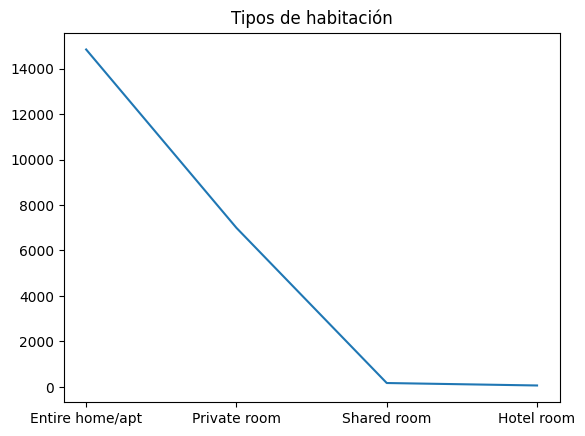

In [13]:
data['room_type'].value_counts().head()
#Graficamos los tipos de habitación
figHab, axHab = plt.subplots()
axHab.plot(data['room_type'].value_counts().head().index, data['room_type'].value_counts().head().values)
axHab.set_title("Tipos de habitación")

## 10 alcaldías con más alojamiento

In [14]:
data = data.dropna(subset=['host_neighbourhood'])

In [15]:
data['host_neighbourhood'].value_counts().head(10)

host_neighbourhood
Polanco                                    1487
Roma Norte                                 1002
Condesa                                     645
Chapultepec Morales                         605
Centro Histórico de la Ciudad de México     460
Hipódromo                                   368
Colonia Cuauhtémoc                          364
Colonia Centro                              356
Centro Histórico                            310
Coapa                                       224
Name: count, dtype: int64

Text(0.5, 1.0, 'Alcaldías con más alojamientos')

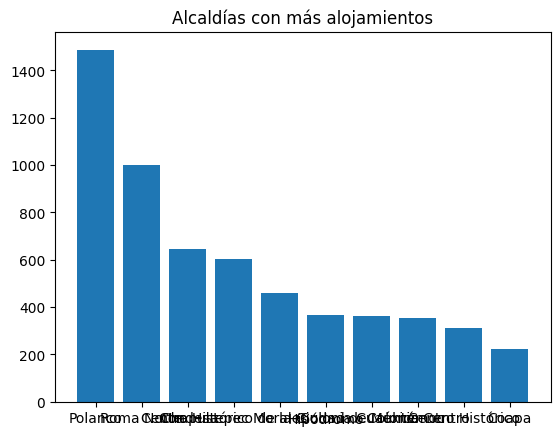

In [16]:
figAlc, axAlc = plt.subplots()
axAlc.bar(data['host_neighbourhood'].value_counts().head(10).index, data['host_neighbourhood'].value_counts().head(10).values)
axAlc.set_title("Alcaldías con más alojamientos")

## Las 10 personas con más alojamientos

In [17]:
data['host_name'].value_counts().head(10)

host_name
Blueground    225
Juan          207
Mr. W         201
Capitalia     154
Alejandra     141
Luis          137
Alejandro     135
Andrea        118
Eduardo       108
HOMi          105
Name: count, dtype: int64

Text(0.5, 1.0, 'Personas con más Airbnbs')

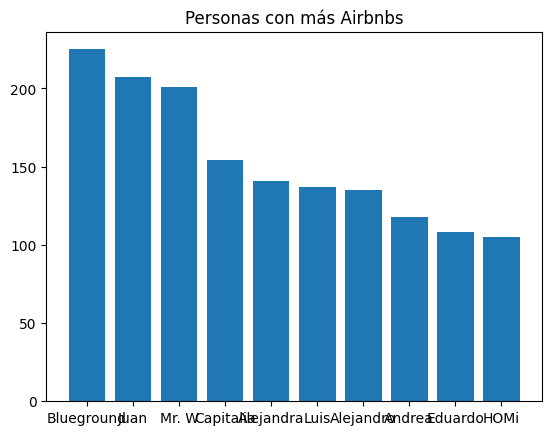

In [18]:
figPer, axPer = plt.subplots()
axPer.bar(data['host_name'].value_counts().head(10).index, data['host_name'].value_counts().head(10).values)
axPer.set_title("Personas con más Airbnbs")

### Segunda parte de la actividad

* Histograma de distribución de precios (frecuencia)
* Gráfica de barras para los tipos de alojamiento vs cantidad
* Gráfica de barras: horizontal del top 10 alcaldías
* Distribución geografica de precios [scatter_mapbox]

<Axes: xlabel='price', ylabel='Count'>

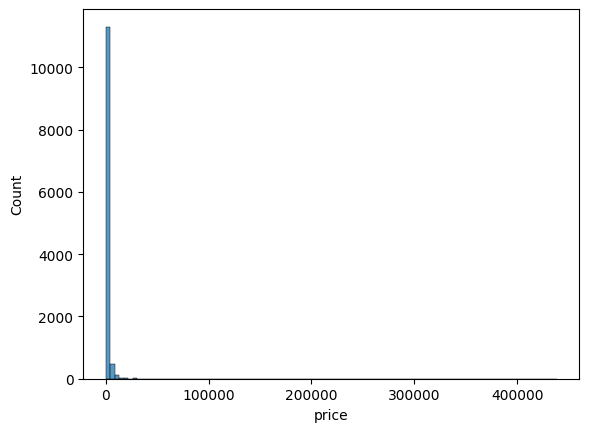

In [19]:
sns.histplot(data['price'], bins = 100)

In [20]:
data['price']

2         585.0
4        1015.0
6        3982.0
7         327.0
8         605.0
          ...  
26058     846.0
26060     228.0
26061     448.0
26062     529.0
26065    1494.0
Name: price, Length: 11998, dtype: float64

Text(0.5, 1.0, 'Tipo de alojamiento vs Cantidad')

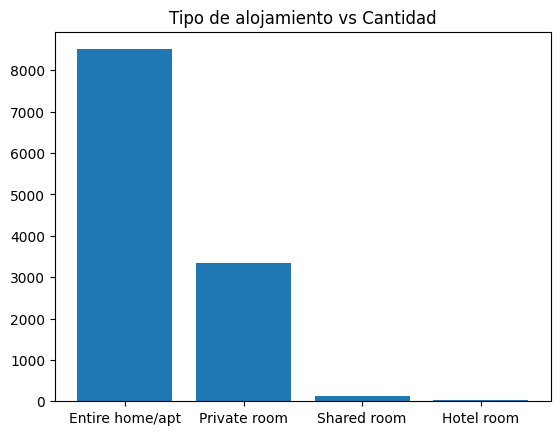

In [21]:
figHab, axHab = plt.subplots()
axHab.bar(data['room_type'].value_counts().head().index, data['room_type'].value_counts().head().values)
axHab.set_title("Tipo de alojamiento vs Cantidad")

## Distribución geográfica de precios scatter_mapbox

In [22]:
import plotly.express as px

In [23]:
fig = px.scatter_map(data,
                        lon = data['longitude'],
                        lat = data['latitude'],
                        zoom = 3,
                        color = data['price'],
                        size = data['price'], #Cambia el tamño de los puntos de acuerdo con el precio
                        title = "Distribución geográfica de precios",
                        )

fig.show()

# Ejercicio: media, mediana y moda (25 de agosto de 2025)

Calcular las medias de tendencia central de todas las columnas que aplique.

Se puede aplicar a:
 * host name x
 * host since x
 * host response rate
 * host acceptance rate
 * host listings count
 * host total listings count
 * room type
 * bathrooms
 * bedrooms
 * beds
 * price
 * maximum minimum nights
 * minim maximum nights
 * maximum maximum nights
 * number of reviews
 * review score rating

np.float64(1877.00716786131)

In [27]:
meanPrice = data['price'].mean()
print(f"El precio promedio de una noche es: ${meanPrice.round(2)}")

El precio promedio de una noche es: $1877.01
